### Business Case: Aerofit - Descriptive Statistics & Probability

#### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

#### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

(1) Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

(2) For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)

In [2]:
df = pd.read_csv("C:/Users/srinj/Downloads/aerofit_treadmill.txt")

In [3]:
df.shape

(180, 9)

In [4]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


checking for Null Values in each columns

In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values found in dataset. 

#### Data pre-processing

Redefine fitness field

In [7]:
df["Fitness_category"] = df["Fitness"]

In [8]:
df["Fitness_category"].replace({1:"Very poor shape",2:"Bad shape", 3:"Average Shape",4:"Good Shape", 5:"Excelent Shape"},inplace=True)

Convert gender and maritial status to category

In [9]:
df = df.astype({"Gender":'category',"MaritalStatus":'category'})

add product price field

In [10]:
def Product_price(df):
    if df['Product'] == "KP281":
        return 1500
    elif df['Product'] == "KP481":
        return 1750
    elif df['Product'] == "KP781":
        return 2500

In [11]:
df["Price"]=df.apply(Product_price, axis=1)

In [12]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Price
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,1500
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad shape,1500


Define age group

In [13]:
df["Age_group"]=pd.cut(df["Age"],bins=[0,21,35,45,55,65],include_lowest=True,labels=["Teen(0 to 21)","Adult(22 to 35)","Mid Age(36 to 45)","Aging(45 to 55)","olding(>55)"])

In [14]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Price,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,1500,Teen(0 to 21)
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,1500,Teen(0 to 21)


In [15]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Price,Age_group
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180,180.000000,180
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,5,NaN,4
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Average Shape,NaN,Adult(22 to 35)
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN,97,NaN,135
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444,NaN,1805.555556,NaN
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605,NaN,387.978895,NaN
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000,NaN,1500.000000,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000,NaN,1500.000000,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000,NaN,1750.000000,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000,NaN,1750.000000,NaN


### General outcomes
1. Median Age of Customer is 26 years.`
2. Maximum users are Adults(22-35) years and are Male and Partnered.`
3. Maximum Selling Product is KP281.`
4. Maximum numbers of customers' fitness level is average shape`
5. Median Miles run/walk per customer : 94 Miles`
6. Median income of the customers :50596.5 USD`
7. Median of average usage per customer : 3 days a week`
8. Average Customer education is 16 years: `

Plotting correlation values in heatmap

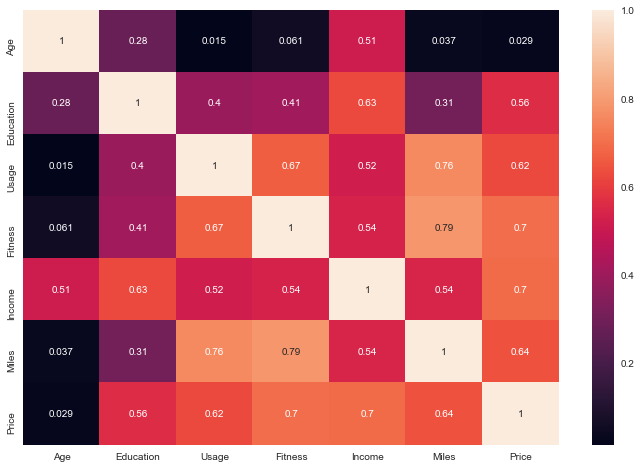

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Fitness and miles have very high correlation (0.79)

Education and income are much correlated (0.63)

Price and income are highly correlated (0.7)

### Gender-wise pair plot

In [17]:
sub_df=df[["Product", "Gender", "Education", "MaritalStatus", "Usage", "Income", "Miles", "Fitness_category", "Price", "Age_group"]]

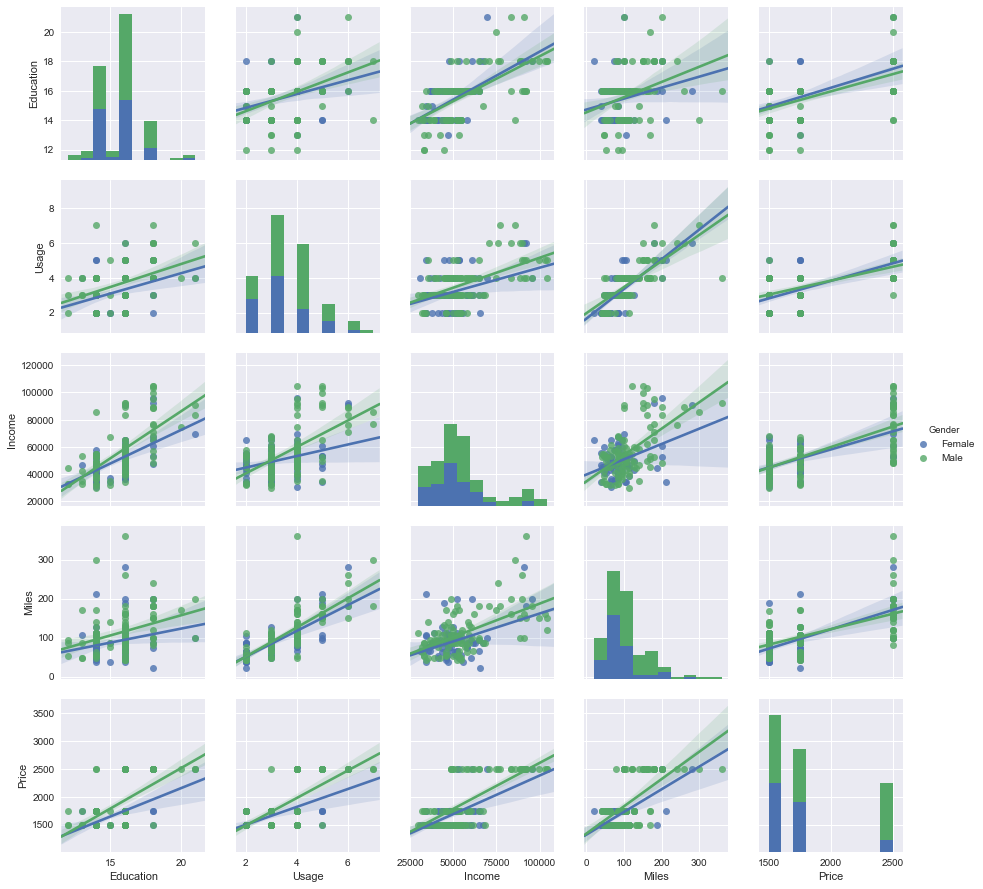

In [18]:
sns.pairplot(sub_df, kind='reg',hue='Gender')

#### Outlier detection

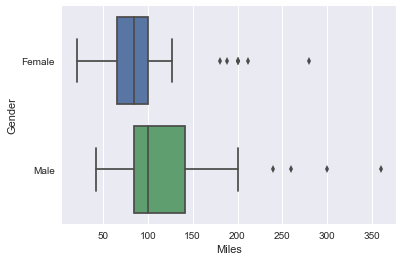

In [19]:
sns.boxplot(x="Miles",data=df,y="Gender")

In [20]:
Miles_Q1 = df['Miles'].quantile(0.25)
Miles_Q3 = df['Miles'].quantile(0.75)
Miles_IQR = Miles_Q3 - Miles_Q1
Miles_ub = Miles_Q3 + (1.5*Miles_IQR)
Miles_lb = Miles_Q1 - (1.5*Miles_IQR)

In [21]:
Miles_ub

187.875

In [22]:
Miles_lb

-7.125

In [23]:
outlier_data = df[df["Miles"]>Miles_ub]
len(outlier_data)

13

13 outliers detected who are running more than 187.875 miles

Considering only upperbound since negative values are not possible

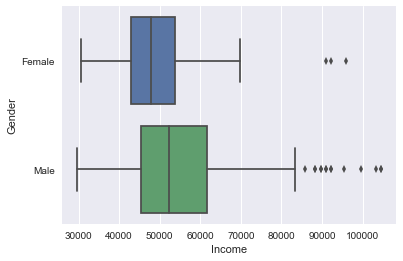

In [24]:
sns.boxplot(x = "Income",data = df,y="Gender")

In [25]:
Income_Q1=df["Income"].quantile(0.25)
Income_Q3=df["Income"].quantile(0.75)
Income_IQR=Income_Q3-Income_Q1
Income_Ub=Income_Q3 + (1.5*Income_IQR)
Income_Ub

80581.875

In [26]:
outlier_income=df[df["Income"]>Income_Ub]
len(outlier_income)

19

19 People has much higher income over 80K yearly

### Sales data

In [27]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

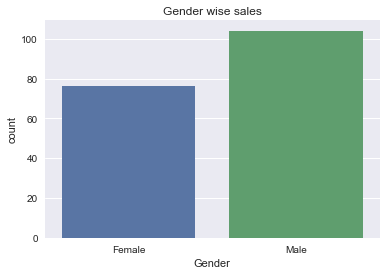

In [28]:
sns.countplot(x="Gender", data=df)
plt.title("Gender wise sales")
plt.show()

In [29]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [30]:
df["Product"].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

Product KP281 of price 1500$ has most sales, over 44%

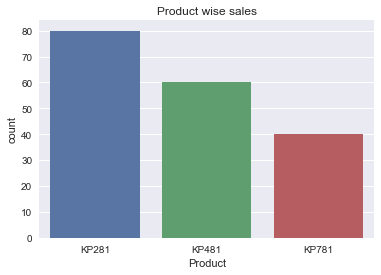

In [31]:
sns.countplot(x="Product", data=df)
plt.title("Product wise sales")
plt.show()

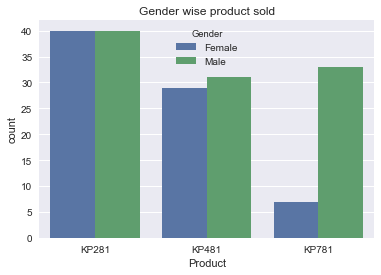

In [32]:
sns.countplot(x="Product", data=df, hue="Gender")
plt.title("Gender wise product sold")
plt.show()

In [33]:
df.groupby("Gender")["Product"].value_counts()

Gender  Product
Female  KP281      40
        KP481      29
        KP781       7
Male    KP281      40
        KP781      33
        KP481      31
Name: Product, dtype: int64

### Marginal prob for gender vs product

In [34]:
((pd.crosstab(df["Product"],df["Gender"],margins=True))/180)*100
#180 is total number of customers

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


Prob of male cutomer buying the the expensive product is 0.18, for female it is 0.04

For rest of two products male and female has almost equal probability to buy

### Conditional prob for gender vs product

In [35]:
(pd.crosstab(df["Product"],df["Gender"],margins=True,normalize="columns"))*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


Prob if buying KP281 given male is 38.5%

Prob if buying KP281 given female is 52.5%

Prob if buying KP781 given male is 31.7%

Prob if buying KP281 given female is 9.2%

In [36]:
df.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Price,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,1500,Teen(0 to 21)


### Analysis by maritial status

In [38]:
df["MaritalStatus"].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

60% partnered and 40% Single

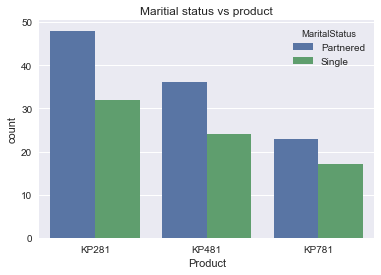

In [40]:
sns.countplot(data=df, x="Product", hue="MaritalStatus")
plt.title("Maritial status vs product")
plt.show()

In [44]:
df.groupby("MaritalStatus")["Product"].value_counts()

MaritalStatus  Product
Partnered      KP281      48
               KP481      36
               KP781      23
Single         KP281      32
               KP481      24
               KP781      17
Name: Product, dtype: int64

### Marginal prob Marital status vs product

In [46]:
(pd.crosstab(df["Product"],df["MaritalStatus"],margins=True)/180)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000


Single person has 9.4% chance to buy the premium product where as that raises to 12.7% for partnered

### Conditional prob Marital status vs product

In [49]:
(pd.crosstab(df["Product"],df["MaritalStatus"],margins=True,normalize="columns"))*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.859813,43.835616,44.444444
KP481,33.644860,32.876712,33.333333
KP781,21.495327,23.287671,22.222222


#### We have almost same probability for Partnered or single for buying any given product.

### Miles count in different product across gender

In [52]:
pd.crosstab(df["Product"],df["Gender"],values=df["Miles"],aggfunc=np.sum,margins=True)

Gender,Female,Male,All
Product,,,
KP281,3048,3575,6623
KP481,2533,2743,5276
KP781,1260,5416,6676
All,6841,11734,18575


In [53]:
pd.crosstab(df["Product"],df["Gender"],values=df["Miles"],aggfunc=np.mean,margins=True)

Gender,Female,Male,All
Product,,,
KP281,76.200000,89.375000,82.787500
KP481,87.344828,88.483871,87.933333
KP781,180.000000,164.121212,166.900000
All,90.013158,112.826923,103.194444


Taking avg miles covered by each gender in each machine gives clear picture in Female - KP781 combo

Male runs almost same avg miles in both KP281 and KP481

The more valuable product people buy, the more people use

### Product vs fitness connection

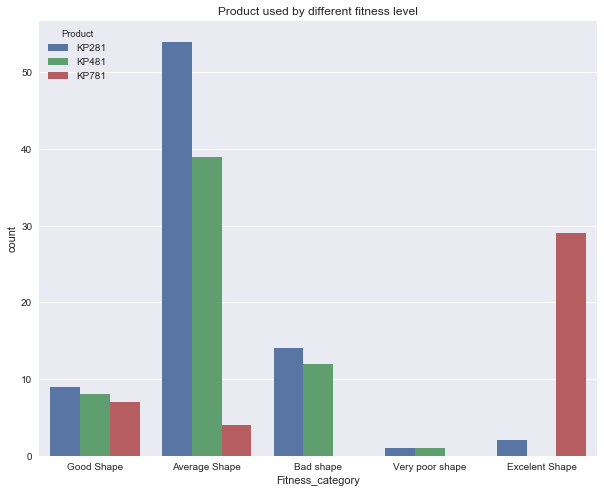

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x="Fitness_category", data=df, hue="Product")
plt.title("Product used by different fitness level")
plt.show()

People in excelent shapes use the top quality product

Avg fitness people try to avoid top quality product

No interest in top product by the people in bad shape

#### Gender vs Fitness

In [60]:
df.groupby("Gender")["Fitness_category"].value_counts()

Gender  Fitness_category
Female  Average Shape       45
        Bad shape           16
        Good Shape           8
        Excelent Shape       6
        Very poor shape      1
Male    Average Shape       52
        Excelent Shape      25
        Good Shape          16
        Bad shape           10
        Very poor shape      1
Name: Fitness_category, dtype: int64

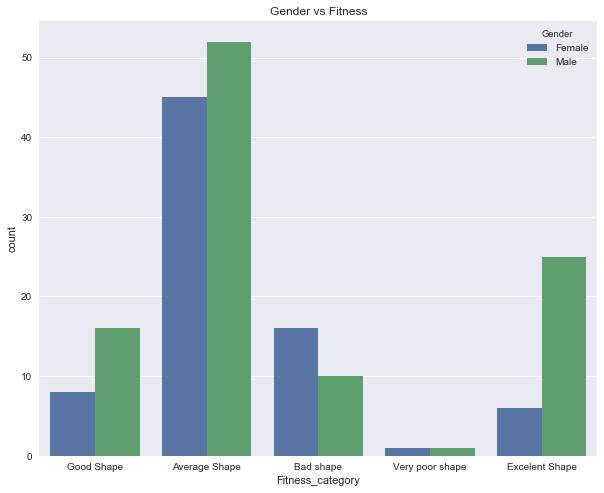

In [59]:
plt.figure(figsize=(10,8))
sns.countplot(x="Fitness_category",data=df,hue="Gender")
plt.title("Gender vs Fitness")
plt.show()

There is a subtle difference in numbers between male and female when they are considered to be in excelent shape

#### Relation between income and product price

In [67]:
df.head(0)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,Price,Age_group


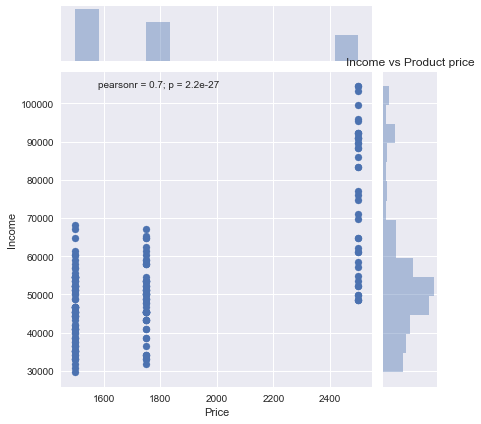

In [73]:
sns.jointplot(x = df["Price"],
              y= df["Income"],
              kind="scatter")
plt.title("Income vs Product price")
plt.show()

People with annual income less than 70k$ is not trying the high end product

### Miles vs Fitness level

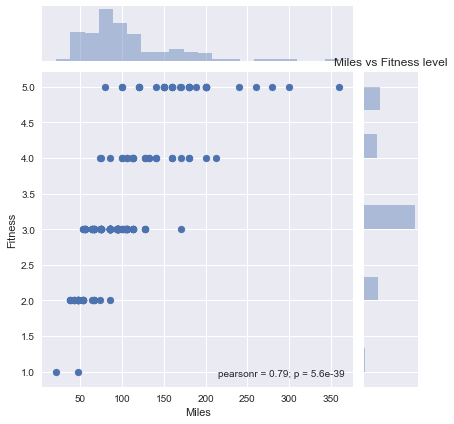

In [76]:
sns.jointplot(x = df["Miles"],
              y= df["Fitness"],
              kind="scatter")
plt.title("Miles vs Fitness level")
plt.show()

People with poor fitness running less than 100 miles

There is a large frequency of data for poor and avg fit people who run just around 100 miles

Peoplw with good or excelent shape tend to run more than 150 miles

#### Miles vs age

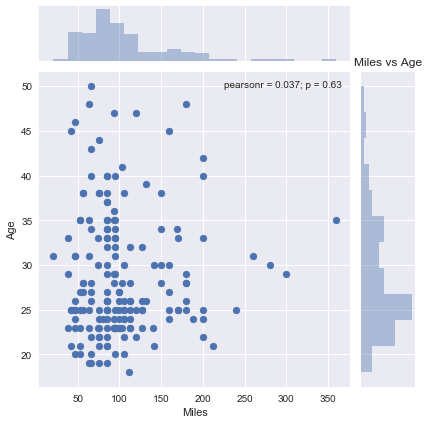

In [77]:
sns.jointplot(x = df["Miles"],
              y= df["Age"],
              kind="scatter")
plt.title("Miles vs Age")
plt.show()

Young people tend to run more, although most of the data points are below 35 years covering under 200 miles

### Age wise product use

In [80]:
pd.crosstab(index=df["Product"],columns=df["Age_group"],margins=True)

Age_group,Teen(0 to 21),Adult(22 to 35),Mid Age(36 to 45),Aging(45 to 55),All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


Products are mostly used by the people between 22 to 35 years of age

Teens dont use high end product

Aging people has significantly low number of product usage

## Customer Profiling - Categorization of users

#### KP281:

- Cheapest product
- Maximum Selling Product.
- have equal male female buyers
- on average 82-83 miles are run in this by the user (significantly large contribution by males)
- mostly used by bad or avg shape people
- highest selling numbers in Adult(22 to 35) age group

#### KP481:

- Intermediate Price Range 
- medium selling numbers
- have almost equal male and female buyers, though female buyers are little high
- on average 89 miles are run in this by the user
- mostly used by avg shape people
- highest selling numbers in Adult(22 to 35) age group

#### KP781:

- high price range
- least sold product
- male buyers are significantly higher for this product
- on average 166 miles are run in this by the user
- best choice for people with excelent shape
- highest selling numbers in Adult(22 to 35) age group and no teen user

### Recommendations:
- Give offer to upgrade the KP481 user to become KP781 user and target the users having income over 50k$ as the income of KP781 user varies from 50k to 100k.

- Good shape people has almost equal distribution between 3 products, give upgradation offer to good shape people with high miles to avail KP781 product.

- In general focus on age group between 22-35 and charge some extra price on well shaped people over age 40 with high income. They will pay to be in shape at this age.

- Target female customes with avg shape and high income for the sale of KP781